<a href="https://colab.research.google.com/github/Leo2park/new/blob/main/Bigdata_S5_03_%EB%AA%A8%EC%88%98%EA%B2%80%EC%A0%95_LAB_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Î™®Ïàò Í≤ÄÏ†ï

### 0.Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú

In [1]:
!git clone https://github.com/Soyoung-Yoon/data_02

Cloning into 'data_02'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 72 (delta 7), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (72/72), 448.80 KiB | 3.53 MiB/s, done.


In [2]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (53/53), 14.21 MiB | 6.04 MiB/s, done.


In [ ]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
# !pip install scipy==1.6.0

### 1.Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(Normality Test)
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ - Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ - Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§
- Ïú†ÏùòÏàòÏ§Ä 0.05 Ïù∏ Í≤ΩÏö∞ : p-value > 0.05, Ï†ïÍ∑úÏÑ±Ïù¥ Î≥¥Ïû•ÎêúÎã§Í≥† Ìï† Ïàò ÏûàÎã§
- Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ < ÏûÑÍ≥ÑÍ∞í, Ï†ïÍ∑úÏÑ±Ïù¥ Î≥¥Ïû•ÎêúÎã§Í≥† Ìï† Ïàò ÏûàÎã§

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data_02/sleepage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   stime20s  20 non-null     int64
 1   stime40s  20 non-null     int64
 2   ID        20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [ ]:
# Í∑∏Î£πÏùÑ ÎÇòÎàÑÏñ¥ Ï†ÄÏû•Ìï®
gA = df['stime20s']
gB = df['stime40s']

In [ ]:
# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï - 1 shapiro wilks test 
from scipy.stats import shapiro
A_statics, A_pvalue = shapiro(gA)
B_statics, B_pvalue = shapiro(gB)
print(f'Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:{A_statics:.4f}, p-value:{A_pvalue:.4f}') # Ï†ïÍ∑úÏÑ± ÎßåÏ°±
print(f'Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:{B_statics:.4f}, p-value:{B_pvalue:.4f}') # Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå

Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:0.9239, p-value:0.1180
Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:0.8810, p-value:0.0184


In [ ]:
# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest
# Îëê Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ôÏùÄ Î∂ÑÌè¨Ïù∏ÏßÄ ÏïÑÎãåÏßÄ Í≤ÄÏ†ï
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÎëêÏßëÎã®Ïùò Î∂ÑÌè¨Í∞Ä Í∞ôÎã§
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÎëêÏßëÎã®Ïùò Î∂ÑÌè¨Í∞Ä Îã§Î•¥Îã§
A_statics, A_pvalue = kstest(gA, "norm")
B_statics, B_pvalue = kstest(gB, "norm")
print(f'Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:{A_statics:.8f}, p-value:{A_pvalue:.8f}') # Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå
print(f'Í∑∏Î£πB: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:{B_statics:.8f}, p-value:{B_pvalue:.8f}') # Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå

Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:0.99999146, p-value:0.00000000
Í∑∏Î£πB: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:0.99999952, p-value:0.00000000


In [ ]:
# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest, norm
# Îëê Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ôÏùÄ Î∂ÑÌè¨Ïù∏ÏßÄ ÏïÑÎãåÏßÄ Í≤ÄÏ†ï
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÎëêÏßëÎã®Ïùò Î∂ÑÌè¨Í∞Ä Í∞ôÎã§
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÎëêÏßëÎã®Ïùò Î∂ÑÌè¨Í∞Ä Îã§Î•¥Îã§
A_statistic, A_pvalue = kstest(gA, norm.cdf)
B_statistic, B_pvalue = kstest(gB, norm.cdf)
print(f'Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: {A_statistic:.8f}, p-value: {A_pvalue:.8f}')  # Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå
print(f'Í∑∏Î£πB: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: {B_statistic:.8f}, p-value: {B_pvalue:.8f}')  # Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå

Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 0.99865010, p-value: 0.00000000
Í∑∏Î£πB: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 0.99999971, p-value: 0.00000000


In [ ]:
# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï - 3 normaltest  (20Í∞ú Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÏöî)  # 20Í∞úÏûÖÎãàÎã§!
from scipy.stats import normaltest
A_statics, A_pvalue = normaltest(gA)
B_statics, B_pvalue = normaltest(gB)
print(f'Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:{A_statics:.4f}, p-value:{A_pvalue:.4f}') # Ï†ïÍ∑úÏÑ± ÎßåÏ°±
print(f'Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:{B_statics:.4f}, p-value:{B_pvalue:.4f}') # Ï†ïÍ∑úÏÑ± ÎßåÏ°±

Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:1.1732, p-value:0.5562
Í∑∏Î£πA: Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:2.0450, p-value:0.3597


In [ ]:
# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï - 4 anderson darling test
# Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ < ÏûÑÍ≥ÑÍ∞í, Ï†ïÍ∑úÏÑ±Ïù¥ Î≥¥Ïû•ÎêúÎã§Í≥† Ìï† Ïàò ÏûàÎã§
from scipy.stats import anderson
rA = anderson(gA)  # statistic Í≤ÄÏ†ïÍ∞í, critical_values ÏûÑÍ≥ÑÍ∞í, significance_level Ïú†ÏùòÏàòÏ§Ä
rB = anderson(gB)
print('Í∑∏Î£πA:', *rA) # 0.56 < 0.57  Ïú†ÏùòÏàòÏ§Ä : 10%, 5%, 2.5%, 1%
print('Í∑∏Î£πB:', *rB)

Í∑∏Î£πA: 0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
Í∑∏Î£πB: 0.8918678522034931 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]


### 2.Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
- burtlett : Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞Í∞Ä ÏÑúÎ°ú Îã§Î•∏ 2Í∞ú Ïù¥ÏÉÅÏùò ÏßëÎã® ÏÇ¨Ïö© Í∞ÄÎä•
- levene, fligner : Ï†ïÍ∑úÏÑ±ÏùÑ Ï∂©Ï°±ÌïòÏßÄ ÏïäÎäî ÎπÑÎ™®Ïàò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÏÇ¨Ïö©Í∞ÄÎä• (Ï§ëÏïôÏùÑ medianÏúºÎ°ú ÏÑ§Ï†ï)

#### 2-1.iris Îç∞Ïù¥ÌÑ∞
- Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï - 3Í∞ÄÏßÄ Î∞©Î≤ïÏúºÎ°ú Ïã§Ìñâ ÌõÑ, pvalue ÌôïÏù∏

In [ ]:
# ÌååÏùº ÏùΩÏñ¥ÏôÄ ÎÇ¥Ïö© ÌôïÏù∏
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head(2))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa


In [ ]:
# [1] target='sepal_length', ÌíàÏ¢ÖÎ≥Ñ Í∑∏Î£πÏùÑ ÎÇòÎàÑÏñ¥ Ï†ÄÏû•Ìï®
import pandas as pd
target='sepal_length' # Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°± x
# target='sepal_width' # Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°± 

# iris['species'].unique()
gA = iris.loc[iris['species']=='setosa',target].to_list()
gB = iris.loc[iris['species']=='versicolor',target].to_list()
gC = iris.loc[iris['species']=='virginica',target].to_list()

In [ ]:
groups = [x.to_list() for name, x in iris.groupby('species')[target]]
gA, gB, gC = groups

In [ ]:
# [2] burtlett Í≤ÄÏ†ï
from scipy.stats import bartlett, shapiro

# Ï†ïÍ∑úÏÑ±Í≤ÄÏ†ï
_, p_valueA =shapiro(gA)
_, p_valueB =shapiro(gB)
_, p_valueC =shapiro(gC)
print(p_valueA, p_valueB, p_valueC) # Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù - Ï†ïÍ∑úÏÑ± ÎßåÏ°±

# Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
statisctic, pvalue = bartlett(gA, gB, gC)
# statisctic, pvalue = bartlett(*groups)
print(statisctic, pvalue)
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å - Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå

0.4595010578632355 0.4647378921508789 0.25831347703933716
16.005701874401502 0.0003345076070163035


In [ ]:
# [3] levene Ïùò centerÎäî 'mean'ÏúºÎ°ú ÏßÄÏ†ï
from scipy.stats import levene
statistic, pvalue = levene(*groups, center='mean')
print(statistic, pvalue) # Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å - Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå

7.381091747801267 0.0008817887814641548


In [ ]:
# [4] flignerÏùò centerÎäî 'trimmed', proportiontocut=5% ÏßÄÏ†ï
from scipy.stats import fligner
statistic, pvalue = fligner(*groups, center='trimmed', proportiontocut=0.05)
print(statistic, pvalue) # Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å - Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå

13.193438547424174 0.0013648383616752843


#### 2-2.tips Îç∞Ïù¥ÌÑ∞
- ÏöîÏùºÎ≥Ñ total_bill Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
- leveneÏùò median, trimmed ÏÇ¨Ïö©

In [ ]:
# ÌååÏùº ÏùΩÏñ¥ÏôÄ ÎÇ¥Ïö© ÌôïÏù∏
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [ ]:
# [1] target = 'total_bill', ÏöîÏùºÎ≥Ñ Í∑∏Î£πÏùÑ ÎÇòÎàÑÏñ¥ Ï†ÄÏû•Ìï®
import pandas as pd
target = 'total_bill'
# tips.info()

groups = [x.to_list() for _,x in tips.groupby('day')[target]]
gA, gB, gC, gD = groups
print(groups)

[[27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.35, 18.64, 11.87, 9.78, 7.51, 19.81, 28.44, 15.48, 16.58, 7.56, 10.34, 43.11, 13.0, 13.51, 18.71, 12.74, 13.0, 16.4, 20.53, 16.47, 18.78], [28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 12.16, 13.42, 8.58, 15.98, 13.42, 16.27, 10.09], [20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 10.59, 10.63, 50.81, 15.81, 26.59, 38.73, 24.27, 12.76, 30.06, 25.89, 48.33, 

In [ ]:
# # gA = iris.loc[iris['species']=='setosa',target].to_list()
# # target = 'total_bill'
# gA = tips.loc[tips['day'] == 'Thur',target].to_list()
# gB = tips.loc[tips['day'] == 'Fri',target].to_list()
# gC = tips.loc[tips['day'] == 'Sat',target].to_list()
# gD = tips.loc[tips['day'] == 'Sun',target].to_list()

# print(gA,gB,gC,gD)

[27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.35, 18.64, 11.87, 9.78, 7.51, 19.81, 28.44, 15.48, 16.58, 7.56, 10.34, 43.11, 13.0, 13.51, 18.71, 12.74, 13.0, 16.4, 20.53, 16.47, 18.78] [28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 12.16, 13.42, 8.58, 15.98, 13.42, 16.27, 10.09] [20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 10.59, 10.63, 50.81, 15.81, 26.59, 38.73, 24.27, 12.76, 30.06, 25.89, 48.33, 13.

In [ ]:
# [2] levene Ïùò centerÎäî 'median'ÏúºÎ°ú ÏßÄÏ†ï
from scipy.stats import levene, shapiro

# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
_,pvalueA = shapiro(gA)
_,pvalueB = shapiro(gB)
_,pvalueC = shapiro(gC)
_,pvalueD = shapiro(gD)
# print(pvalueA, pvalueB, pvalueC, pvalueD)  # Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå
print([round(shapiro(x)[1], 4) for x in groups])
# print(f'{shapiro(x)[1]:.4f}' for x in groups)

# Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
statistic, pvalue = levene(*groups, center='median')
print(statistic, pvalue) # Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±

[0.0, 0.0409, 0.0, 0.0036]
0.6653578279881612 0.5740792267812198


In [ ]:
# [3] flignerÏùò centerÎäî 'trimmed', proportiontocut=5% ÏßÄÏ†ï
from scipy.stats import fligner
statistic, pvalue = fligner(*groups, center='trimmed',
                            proportiontocut=0.05)
print(statistic, pvalue)  # Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±Ìï®

In [ ]:
pd.read_csv('')

### 3.T Í≤ÄÏ†ï(ÌèâÍ∑† Í≤ÄÏ†ï)

t-test Ïù¥Ìï¥
- Ïä§ÌäúÎçòÌä∏ t-ÌÖåÏä§Ìä∏(Student's t-test)ÎùºÍ≥†ÎèÑ ÌïòÎ©∞, Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâÏù¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ ÌïòÏóêÏÑú t-Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§ Í≤ÄÏ†ï
- ÌëúÎ≥∏ÏùÑ ÏÇ¨Ïö©Ìïú Î™®ÌèâÍ∑† Í≤ÄÏ†ï Î∞è Îëê Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏(ÏßëÎã®)Ïùò Î™®ÌèâÍ∑†Ïù¥ ÏÑúÎ°ú Ïú†ÏùòÌïòÍ≤å Îã§Î•∏ÏßÄ Ïó¨Î∂ÄÎ•º ÌåêÎ≥Ñ Ìï† Ïàò ÏûàÏùå
- Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâÏù¥ Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥Î©∞ Î™®ÏßëÎã®Ïùò Î∂ÑÏÇ∞, ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏïåÏßÄ Î™ªÌï† Îïå ÌëúÎ≥∏ÏúºÎ°ú Î∂ÄÌÑ∞ Ï∂îÏ†ïÎêú Î∂ÑÏÇ∞/ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏÇ¨Ïö©Ìï¥ Í≤ÄÏ†ïÌï®
- t-testÎ•º Ïã§ÏãúÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï†ïÍ∑úÏÑ± Î∞è Îì±Î∂ÑÏÇ∞ÏÑ±Ïùò Ï°∞Í±¥Ïù¥ ÎßåÏ°±ÎêòÏñ¥Ïïº Ìï®


#### 3-1.One sample t-test
- stats.ttest_1samp ÏÇ¨Ïö©
- 20ÎåÄ ÌèâÍ∑† ÏàòÎ©¥ÏãúÍ∞ÑÏóê ÎåÄÌïú one samle t-test
- Ïú†ÏùòÏàòÏ§ÄÏùÄ 5% ÏÇ¨Ïö©
- Ïà´ÏûêÎäî Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàòÏ†ê ÏïÑÎûò 4Î≤àÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú

In [3]:
# [1] ÏàòÎ©¥ ÏãúÍ∞Ñ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îêú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
import pandas as pd

df = pd.read_csv("./data_02/sleepage.csv")
print(df.shape)
df.T

(20, 3)


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
stime20s   4   4   5   5   6   6   7   3   8   7   8   8   7   7   7   6   8   
stime40s   5   5   6   7   6   7   7   5   5   6   8   7   6   6   8   7   7   
ID         1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17   

          17  18  19  
stime20s   5   6   6  
stime40s   6   5   8  
ID        18  19  20

In [4]:
# [1] 20ÎåÄÏùò ÏàòÎ©¥ÏãúÍ∞ÑÏóê ÎåÄÌï¥ Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
# one sampleÏù¥ÎØÄÎ°ú Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï ÌïÑÏöî ÏóÜÏùå
from scipy.stats import shapiro
statistic,pvalue = shapiro(df['stime20s'])
print(round(statistic,4),round(pvalue,4))
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')

0.9239 0.118
Ï±ÑÌÉù


In [5]:
# [2] 20ÎåÄÏùò ÏàòÎ©¥ÏãúÍ∞ÑÏóê ÎåÄÌï¥ ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
sleep = df['stime20s']. mean()
print(round(sleep,4), f'{sleep :.04f}')

6.15 6.1500


Í∞ÄÏÑ§ 1.alternative='two-sided'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ - 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞ÑÏù¥Îã§.
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ - 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞ÑÏù¥ ÏïÑÎãàÎã§.

In [6]:
# [3] One Sample t-test ÏàòÌñâ
from scipy.stats import ttest_1samp
popmean = 6
statistic, pvalue = ttest_1samp(df['stime20s'], popmean, alternative='two-sided')
print(round(statistic,4), round(pvalue,4)) # 0.6513 #0.0023(5ÏãúÍ∞Ñ)

0.4592 0.6513


In [7]:
# [4] Í∞ÄÏÑ§ Í≤∞Í≥º
# p-value > 0.05 Î≥¥Îã§ ÌÅ¨Îã§ 
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï¥Ïïº ÌïúÎã§.
# 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞ÑÏù¥Îã§.
print('Í∏∞Í∞Å'if pvalue < 0.05 else'Ï±ÑÌÉù')

Ï±ÑÌÉù


Í∞ÄÏÑ§-2. alternative='less'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ - 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞Ñ Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§.
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ - 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞Ñ Î≥¥Îã§ ÏûëÎã§

In [8]:
# [5] One Sample t-test ÏàòÌñâ
from scipy.stats import ttest_1samp
statistic, pvalue = ttest_1samp(df['stime20s'], popmean, alternative='less')
print(round(statistic,4), round(pvalue,4)) # 0.6743 #0.9989(5ÏãúÍ∞Ñ)

0.4592 0.6743


In [9]:
# [6] Í∞ÄÏÑ§ Í≤∞Í≥º
# p-value > 0.05 Î≥¥Îã§ ÌÅ¨Îã§ 
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï¥Ïïº ÌïúÎã§.
# 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ  6ÏãúÍ∞Ñ Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§.
print('Í∏∞Í∞Å'if pvalue < 0.05 else'Ï±ÑÌÉù')

Ï±ÑÌÉù


Í∞ÄÏÑ§-3. alternative='greater'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ - 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞Ñ Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§.
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ - 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞Ñ Î≥¥Îã§ ÌÅ¨Îã§

In [10]:
# [7] One Sample t-test ÏàòÌñâ
from scipy.stats import ttest_1samp
statistic, pvalue = ttest_1samp(df['stime20s'], popmean, alternative='greater')
print(round(statistic,4), round(pvalue,4)) # 0.4592 0.3257   0.0011(5ÏãúÍ∞Ñ)

0.4592 0.3257


In [11]:
# [6] Í∞ÄÏÑ§ Í≤∞Í≥º
# p-value > 0.05 Î≥¥Îã§ ÌÅ¨Îã§ 
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï¥Ïïº ÌïúÎã§.
# 20ÎåÄ ÏàòÎ©¥ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÄ 6ÏãúÍ∞Ñ Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§.
print('Í∏∞Í∞Å'if pvalue < 0.05 else'Ï±ÑÌÉù')

Ï±ÑÌÉù


In [12]:
# [9] 95% Ïã†Î¢∞Íµ¨Í∞Ñ Íµ¨ÌïòÍ∏∞
from scipy.stats import t, sem
target = df['stime20s']
lower, upper = t(df=len(target)-1).interval(0.95, loc=target.mean(), scale=sem(target))
print(f'{lower:.4f} ~ {upper:.4f}')

5.4663 ~ 6.8337


#### 3-2.Two-sample t-test
- ÎëêÏßëÎã® A, BÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ÌïúÏßÄ ÌôïÏù∏ÌïòÎäî Ïö©ÎèÑ
- 20ÎåÄÏôÄ 40ÎåÄÏùò ÏàòÎ©¥ ÏãúÍ∞ÑÏùÄ Í∞ôÎã§
- stats.test_ind : (two INDependent sampleÏù¥Îùº Ìï¥ÏÑú ttest_ind )
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- tÍ∞íÍ≥º two-tail p-valueÎ•º Î∞òÌôòÌï®
- ttest_ind(a, b, equal_var=False) : Welch's t-test ÏàòÌñâ (Îì±Î∂ÑÏÇ∞Ïù¥ ÏïÑÎãå Í≤ΩÏö∞)

In [13]:
# [1] ÏàòÎ©¥ ÏãúÍ∞Ñ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îêú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
df2 = pd.read_csv('./data_02/sleepage.csv')
print(df2.shape)
df2.T

(20, 3)


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
stime20s   4   4   5   5   6   6   7   3   8   7   8   8   7   7   7   6   8   
stime40s   5   5   6   7   6   7   7   5   5   6   8   7   6   6   8   7   7   
ID         1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17   

          17  18  19  
stime20s   5   6   6  
stime40s   6   5   8  
ID        18  19  20

In [14]:
# [2] Í∑∏Î£π Î∂ÑÌï†ÌïòÍ∏∞
groupA = df2.loc[:,'stime20s']
groupB = df2.loc[:,'stime40s']

In [15]:
# [3] Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
print(round(groupA.mean(),4), round(groupB.mean(),4))

6.15 6.35


In [20]:
# [4] Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï - 3Í∞ÄÏßÄ Î∞©Î≤ïÏúºÎ°ú Ïã§Ìñâ ÌõÑ, pvalue ÌôïÏù∏
from scipy.stats import shapiro
from scipy.stats import levene, fligner, bartlett

# Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
statisticA, pvalueA = shapiro(groupA) # Ï†ïÍ∑úÏÑ± ÎßåÏ°±
statisticB, pvalueB = shapiro(groupB) # Ï†ïÍ∑úÏÑ± ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå
print(f'{pvalueA:.04f} , {pvalueB:.04f}')

# Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
statisticA, pvalueA = levene(groupA, groupB) # Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±
statisticB, pvalueB = fligner(groupA, groupB) # Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±
statisticC, pvalueC = bartlett(groupA, groupB) # Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±
print(f'{pvalueA:.04f} , {pvalueB:.04f}, {pvalueC:.04f}')


0.1180 , 0.0184
0.2312 , 0.1808, 0.1475


In [ ]:
# Îì±Î∂ÑÏÇ∞ Í∞ÄÏ†ïÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏúºÎ©¥(equal_var=False) Welch's T-testÎ•º ÏàòÌñâÌïúÎã§.

Í∞ÄÏÑ§1. alternative='two-sided'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Í≥º Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Í≥º Í∞ôÏßÄ ÏïäÎã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : groupA, groupBÏùò ÌèâÍ∑†ÏùÄ ÎèôÏùºÌïòÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : groupA, groupBÏùò ÌèâÍ∑†ÏùÄ ÎèôÏùºÌïòÏßÄ ÏïäÎã§

In [21]:
# [5] two-sample t-test ÏàòÌñâ
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(groupA, groupB, alternative='two-sided')
print(f'statistic: {statistic:.04f}, pvalue: {pvalue:.04f}')

statistic: -0.4988, pvalue: 0.6208


In [ ]:
# [6] Í∞ÄÏÑ§ Í≤∞Í≥º
# pvalueÍ∞Ä 0.05Î≥¥Îã§ ÌÅ∞Í∞í (0.6208)
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï¥Ïïº Ìï®
# Ï¶â, 20ÎåÄÏôÄ 40ÎåÄÏùò ÌèâÍ∑† ÏàòÎ™Ö ÏãúÍ∞ÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. (ÎèôÏùºÌïòÎã§)
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')

Ï±ÑÌÉù


Í∞ÄÏÑ§2. alternative='less'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÏûëÎã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑†Ïù¥ groupBÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑†Ïù¥ groupBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÎã§

In [22]:
# [7] two-sample t-test ÏàòÌñâ
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(groupA, groupB, alternative='less')
print(f'statistic: {statistic:.04f}, pvalue: {pvalue:.04f}')

statistic: -0.4988, pvalue: 0.3104


In [23]:
# [8] Í∞ÄÏÑ§ Í≤∞Í≥º
# pvalueÍ∞Ä 0.05Î≥¥Îã§ ÌÅ∞Í∞í (0.3104)
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï¥Ïïº Ìï®
# Ï¶â, groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§.
# groupAÏùò ÌèâÍ∑†Ïù¥ groupBÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')

Ï±ÑÌÉù


Í∞ÄÏÑ§3. alternative='greater'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÌÅ¨Îã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑†Ïù¥ groupBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : groupAÏùò ÌèâÍ∑†Ïù¥ groupBÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§

In [24]:
# [9] two-sample t-test ÏàòÌñâ
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(groupA, groupB, alternative='greater')
print(f'statistic: {statistic:.04f}, pvalue: {pvalue:.04f}')

statistic: -0.4988, pvalue: 0.6896


In [25]:
# [10] Í∞ÄÏÑ§ Í≤∞Í≥º
# pvalueÍ∞Ä 0.05Î≥¥Îã§ ÌÅ∞Í∞í (0.6896)
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï¥Ïïº Ìï®
# Ï¶â, groupAÏùò ÌèâÍ∑† - groupBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§.
# groupAÏùò ÌèâÍ∑†Ïù¥ groupBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')

Ï±ÑÌÉù


#### 3-3.Paired t-test 
- ÎèôÏùºÌïú ÌäπÏÑ±ÏùÑ Í∞ôÎäî ÎëêÏßëÎã® A, BÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ÌïúÏßÄ ÌôïÏù∏ÌïòÎäî Ïö©ÎèÑ
- Ï≤òÏπò Ï†Ñ/ÌõÑ ÎπÑÍµê(Ìö®Í≥º Í≤ÄÏ†ï), Ìïú ÏßëÎã®Ïóê ÎåÄÌï¥ Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏóê ÎåÄÌïú Ï∞®Ïù¥ Í≤ÄÏ†ï Îì±Ïóê ÏÇ¨Ïö©
- Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ïÏùÄ ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê®
- Îëê ÏïΩ Ìà¨Ïó¨Ïóê Îî∞Î•∏ Ï∂îÍ∞Ä ÏàòÎ©¥ ÏãúÍ∞Ñ ÌèâÍ∑†Ïùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÍ∞Ä?
- stats.ttest_rel: (two RELated samples)

In [26]:
# [1] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
import pandas as pd
import numpy as np
df2 = pd.read_csv('./data_02/sleep.csv')
print(df2.shape)
df2.T

(20, 3)


0    1    2    3    4    5    6    7    8     9    10   11   12   13  \
extra  0.7 -1.6 -0.2 -1.2 -0.1  3.4  3.7  0.8  0.0   2.0  1.9  0.8  1.1  0.1   
group  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   1.0  2.0  2.0  2.0  2.0   
ID     1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  1.0  2.0  3.0  4.0   

        14   15   16   17   18    19  
extra -0.1  4.4  5.5  1.6  4.6   3.4  
group  2.0  2.0  2.0  2.0  2.0   2.0  
ID     5.0  6.0  7.0  8.0  9.0  10.0

In [27]:
# [2] Í∑∏Î£π ÎÇòÎàÑÍ∏∞
gA = df2.loc[df2.group==1, 'extra']
gB = df2.loc[df2.group==2, 'extra']

In [28]:
# [3] Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(shapiro)
from scipy.stats import shapiro
statisticA, pvalueA = shapiro(gA)
statisticB, pvalueB = shapiro(gB)
print(f'statistic:{statisticA:.4f} pvalue:{pvalueA:.4f}')
print(f'statistic:{statisticB:.4f} pvalue:{pvalueB:.4f}')
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù Ï†ïÍ∑úÏÑ± ÎßåÏ°±

statistic:0.9258 pvalue:0.4079
statistic:0.9193 pvalue:0.3511


In [29]:
# [4] Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(normaltest) - N>=20
from scipy.stats import  normaltest
normaltest(gA)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.8834543265697302, pvalue=0.6429250250799996)

In [30]:
# [5] gAÏôÄ gBÏùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
meanA, meanB = gA.mean(), gB.mean()
print(f'{meanA:.4f}, {meanB:.4f}')

0.7500, 2.3300


Í∞ÄÏÑ§1. alternative='two-sided'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : gAÏùò ÌèâÍ∑† - gBÏùò ÌèâÍ∑†Ïù¥ 0Í≥º Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : gAÏùò ÌèâÍ∑† - gBÏùò ÌèâÍ∑†Ïù¥ 0Í≥º Í∞ôÏßÄ ÏïäÎã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : gAÏôÄ gBÏùò ÌèâÍ∑†ÏùÄ Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : gAÏôÄ gBÏùò ÌèâÍ∑†ÏùÄ Í∞ôÏßÄ ÏïäÎã§

In [31]:
# [6] Paired t-test
from scipy.stats import ttest_rel
statistic, pvalue = ttest_rel(gA, gB, alternative ='two-sided')
print(f'statistic:{statistic:.4f} pvalue:{pvalue:.4f}')
#statistic:{statisticA:.4f} pvalue:{pvalueA:.4f}')
#statisticÏù¥ ÏùåÏàò : gBÏùò ÌèâÍ∑†Ïù¥ ÌÅ∞Í≤ÉÏùÑ ÏùòÎØ∏

statistic:-4.0621 pvalue:0.0028


In [ ]:
# [7] Í≤∞Í≥ºÌï¥ÏÑù
# pvalue Í∞Ä 0.05Î≥¥Îã§ ÏûëÏùå
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
# gA ÏôÄ gBÏùò ÌèâÍ∑†ÏùÄ Í∞ôÏßÄ ÏïäÎã§
print('Í∏∞Í∞Å'if pvalue < 0.05 else 'Ï±ÑÌÉù')  #Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å / Ï±ÑÌÉù


Í∏∞Í∞Å


Í∞ÄÏÑ§2. alternative='less'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : gAÏùò ÌèâÍ∑† - gBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : gAÏùò ÌèâÍ∑† - gBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÏûëÎã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : gAÏùò ÌèâÍ∑†Ïù¥ gBÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : gAÏùò ÌèâÍ∑†Ïù¥ gBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÎã§

The t-statistic is calculated as np.mean(a - b)/se, where se is the standard error. Therefore, the t-statistic will be positive when the sample mean of a - b is greater than zero and negative when the sample mean of a - b is less than zero

In [ ]:
# [8] Paired t-test
from scipy.stats import ttest_rel
statistic, pvalue = ttest_rel(gA, gB, alternative ='less')
print(f'statistic:{statistic:.4f} pvalue:{pvalue:.4f}')
# statistic: -4.0621 p-value: 0.0014
# statisticÏù¥ ÏùåÏàò : gAÏùò ÌèâÍ∑†Ïù¥ ÏûëÍ≥†, gBÏùò ÌèâÍ∑†Ïù¥ ÌÅº

statistic:-4.0621 pvalue:0.0014


In [ ]:
# [9] Í≤∞Í≥ºÌï¥ÏÑù
# pvalue Í∞Ä 0.05Î≥¥Îã§ ÏûëÏùå
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
# gAÏùò ÌèâÍ∑†Ïù¥ gBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÎã§
print('Í∏∞Í∞Å'if pvalue < 0.05 else 'Ï±ÑÌÉù')  #Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å / Ï±ÑÌÉù

Í∏∞Í∞Å


Í∞ÄÏÑ§3. alternative='greater'
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : gAÏùò ÌèâÍ∑† - gBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : gAÏùò ÌèâÍ∑† - gBÏùò ÌèâÍ∑†Ïù¥ 0Î≥¥Îã§ ÌÅ¨Îã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : gAÏùò ÌèâÍ∑†Ïù¥ gBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : gAÏùò ÌèâÍ∑†Ïù¥ gBÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§

In [ ]:
# [10] Paired t-test
from scipy.stats import ttest_rel
statistic, pvalue = ttest_rel(gA, gB, alternative ='greater')
print(f'statistic:{statistic:.4f} pvalue:{pvalue:.4f}')
# statistic:-4.0621 pvalue:0.9986
# statisticÏù¥ ÏùåÏàò : gAÏùò ÌèâÍ∑†Ïù¥ ÏûëÍ≥†, gBÏùò ÌèâÍ∑†Ïù¥ ÌÅº


statistic:-4.0621 pvalue:0.9986


In [ ]:
# [11] Í≤∞Í≥ºÌï¥ÏÑù
# p-value Í∞Ä 0.05Î≥¥Îã§ ÌÅº
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§
# gAÏùò ÌèâÍ∑†Ïù¥ gBÏùò ÌèâÍ∑†Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÎã§
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')  # Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å/Ï±ÑÌÉù


Ï±ÑÌÉù


#### 3-4.Î∂ÑÎ•ò Î™®Îç∏ÏóêÏÑú ÌôúÏö©

In [32]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
data.head(2)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1

1Í∞ú Ïó∞ÏÜçÌòï Î≥ÄÏàò, 1Í∞ú Î≤îÏ£ºÌòï Î≥ÄÏàò (2Í∞ú Î≤îÏ£º)
- Î≤îÏ£ºÎ≥ÑÎ°ú Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Í≤ÄÏ†ïÌïúÎã§

In [46]:
# t-test
# Ïó∞ÏÜçÌòï Î≥ÄÏàò : 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
# Î≤îÏ£ºÌòï Î≥ÄÏàò : 'Reached.on.Time_Y.N'

from scipy.stats import shapiro, kstest, bartlett
from scipy.stats import ttest_ind

# [1] Í∑∏Î£π ÎÇòÎàÑÍ∏∞
feature = 'Cost_of_the_Product'
condition_0 = data['Reached.on.Time_Y.N'] == 0
condition_1 = data['Reached.on.Time_Y.N'] == 1
group0 = data.loc[condition_0,feature]
group1 = data.loc[condition_1,feature]
print(feature, group0.shape, group1.shape)

# [2] Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
# Ï†ïÍ∑úÏÑ±
statistic, pvalue = kstest(group0,'norm')
print(f'ks - statistic:{statistic:.4f}, pvalue:{pvalue:.4f}')  #Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌï®

statistic, pvalue = kstest(group1,'norm')
print(f'ks - statistic:{statistic:.4f}, pvalue:{pvalue:.4f}')  #Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌï®  N > 5000 ksÎ°ú Î∞îÍøà

# Îì±Î∂ÑÏÇ∞ÏÑ±
statistic, pvalue = bartlett(group0, group1)
print(f'bartlett - statistic:{statistic:.4f}, pvalue:{pvalue:.4f}')
# pvalue:0.6516 Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±


# [3] ttest_ind
statistic, pvalue = ttest_ind(group0, group1)
print(f'ttest_ind - statistic:{statistic:.4f}, pvalue:{pvalue:.4f}')


# [4] Í≤∞Î°†
# pvalue:0.0000  0.05 Î≥¥Îã§ ÏûëÏùå
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï®
# Îëê Í∑∏Î£πÏùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§! # statistic:7.7378 Í∑∏Î£π0Ïùò ÌèâÍ∑†Ïù¥ Í∑∏Î£π1 ÌèâÍ∑† Î≥¥Îã§ ÌÅ¨Îã§

mean_g0, mean_g1 = group0.mean(), group1.mean()
print(f'{mean_g0:.4f}, {mean_g1:.4f}')

Cost_of_the_Product (4436,) (6563,)
ks - statistic:1.0000, pvalue:0.0000
ks - statistic:1.0000, pvalue:0.0000
bartlett - statistic:0.2039, pvalue:0.6516
ttest_ind - statistic:7.7378, pvalue:0.0000
214.4986, 207.2892


In [51]:
def my_ttest_ind(data, feature, target):
    group0 = data.loc[data[target] == 0, feature]
    group1 = data.loc[data[target] == 1, feature]
    mean_g0, mean_g1 = group0.mean(), group1.mean()
    print(f'{mean_g0:.4f}, {mean_g1:.4f}')
    _, pvalue = ttest_ind(group0, group1)
    print(f'ttest_ind - p-value:{pvalue:.4f}')
    print('Ïú†ÏùòÎØ∏' if pvalue < 0.05 else 'ÏùòÎØ∏Í∞Ä ÏóÜÎã§')

# 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
for feature in ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']:
    print(feature)
    my_ttest_ind(data, feature, 'Reached.on.Time_Y.N') 

Cost_of_the_Product
214.4986, 207.2892
ttest_ind - p-value:0.0000
Ïú†ÏùòÎØ∏
Weight_in_gms
4168.6684, 3272.6401
ttest_ind - p-value:0.0000
Ïú†ÏùòÎØ∏
Discount_offered
5.5460, 18.6637
ttest_ind - p-value:0.0000
Ïú†ÏùòÎØ∏


#### 3-5.Î™®ÌèâÍ∑†Ïóê Í¥ÄÌïú t-test
A ÌöåÏÇ¨ÏóêÏÑú ÌåêÎß§ÌïòÎäî Î™®ÎãàÌÑ∞Îäî ÌèâÍ∑† 5Í∞ú Î≥¥Îã§ Ï†ÅÏùÄ Î∂àÎüâÌôîÏÜåÎ•º Ìè¨Ìï®ÌïúÎã§Í≥† Ï£ºÏû•ÌïúÎã§. Ïù¥ Ï£ºÏû•ÏùÑ ÌåêÎã®ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌñàÏúºÎ©∞, Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞(data_02/defective.csv)ÏóêÎäî Î™®ÎãàÌÑ∞ 25Í∞úÏóêÏÑú Ï°∞ÏÇ¨Ìïú Î∂àÎüâÌôîÏÜå Í∞úÏàòÍ∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎã§. 
- Î∂àÎüâÌôîÏÜåÏùò Í∞úÏàòÎäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Ìï† Îïå, Ïù¥ Ï£ºÏû•Ïùò ÌÉÄÎãπÏÑ± Ïó¨Î∂ÄÎ•º Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú Í≤ÄÏ†ïÌïòÏó¨Îùº
- ùëØ_ùüé  : ùùÅ‚â•ùüì, ùëØ_ùüè  : ùùÅ<ùüì, defective_pixel :  Î∂àÎüâÌôîÏÜå Í∞úÏàò
- (a) Î∂àÎüâÌôîÏÜåÏùò ÌëúÎ≥∏ ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏãúÏò§ (Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàò ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ Í≥ÑÏÇ∞)
- (b) ÏúÑÏùò Í∞ÄÏÑ§ÏùÑ Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌïú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâÏùÑ ÏûÖÎ†•ÌïòÏãúÏò§.(Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàò ÎÑ∑Ïß∏ÏûêÎ¶¨ÍπåÏßÄ Í≥ÑÏÇ∞)
- (c) ÏúÑÏùò ÌÜµÍ≥ÑÎüâÏóê ÎåÄÌïú p-Í∞íÏùÑ Íµ¨ÌïòÏó¨ ÏûÖÎ†•ÌïòÏãúÏò§. (Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàò ÎÑ∑Ïß∏ÏûêÎ¶¨ÍπåÏßÄ Í≥ÑÏÇ∞)
- (d) Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóêÏÑú Í∞ÄÏÑ§Í≤ÄÏ†ïÏùò Í≤∞Í≥ºÎ•º (Ï±ÑÌÉù/Í∏∞Í∞Å) Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨ ÏûÖÎ†•ÌïòÏãúÏò§.



In [79]:
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : A ÌöåÏÇ¨ÏóêÏÑú ÌåêÎß§ÌïòÎäî Î™®ÎãàÌÑ∞Ïùò Î∂àÎüâÌôîÏÜå ÌèâÍ∑†Ïù¥ 5Í∞ú Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§.
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : A ÌöåÏÇ¨ÏóêÏÑú ÌåêÎß§ÌïòÎäî Î™®ÎãàÌÑ∞Ïùò Î∂àÎüâÌôîÏÜå ÌèâÍ∑†Ïù¥ 5Í∞ú Î≥¥Îã§ Ï†ÅÎã§.

import pandas as pd
from scipy.stats import ttest_1samp

data = pd.read_csv('data_02/defective.csv')
# print(data.shape)
# print(data.head(5)) #'defective_pixel'

print(round(data['defective_pixel'].mean(),4))
statistic, pvalue = ttest_1samp(data['defective_pixel'],5,alternative='two-sided')
print(round(statistic,4))
print(round(pvalue,4))
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')


4.84
-1.4446
0.1615
Ï±ÑÌÉù


#### 3-6.ÏûëÏóÖ3Ïú†Ìòï ÏòàÏãúÎ¨∏Ï†ú
Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞(data_02/blood_pressure.csv)ÏóêÎäî Í≥†ÌòàÏïï ÌôòÏûê 120Î™ÖÏùò ÏπòÎ£å Ï†ÑÌõÑÏùò ÌòàÏïïÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎã§. Ìï¥Îãπ ÏπòÎ£åÍ∞Ä Ìö®Í≥ºÍ∞Ä ÏûàÎäîÏßÄ (Ï¶â, ÏπòÎ£å ÌõÑÏùò ÌòàÏïïÏù¥ Í∞êÏÜåÌñàÎäîÏßÄ) ÏåçÏ≤¥ÌëúÎ≥∏ t-Í≤ÄÏ†ï(paired t-test)Î•º ÌÜµÌï¥ ÎãµÌïòÍ≥†Ïûê ÌïúÎã§. Í∞ÄÏÑ§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÎã§
- ùëØ_ùüé  : ùùÅ_ùíÖ‚â•ùüé, ùëØ_ùüè  : ùùÅ_ùíÖ<ùüé  (ùùÅ_ùíÖ : ÏπòÎ£å ÌõÑ ÌòàÏïï ‚Äì ÏπòÎ£å Ï†Ñ ÌòàÏïï)Ïùò ÌèâÍ∑†
- bp_before : ÏπòÎ£å Ï†Ñ ÌòàÏïï, bp_after : ÏπòÎ£å ÌõÑ ÌòàÏïï
- (a) udÏùò ÌëúÎ≥∏ ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏãúÏò§ (Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàò ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ Í≥ÑÏÇ∞)
- (b) ÏúÑÏùò Í∞ÄÏÑ§ÏùÑ Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌïú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâÏùÑ ÏûÖÎ†•ÌïòÏãúÏò§.(Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàò ÎÑ∑Ïß∏ÏûêÎ¶¨ÍπåÏßÄ Í≥ÑÏÇ∞)
- (c) ÏúÑÏùò ÌÜµÍ≥ÑÎüâÏóê ÎåÄÌïú p-Í∞íÏùÑ Íµ¨ÌïòÏó¨ ÏûÖÎ†•ÌïòÏãúÏò§. (Î∞òÏò¨Î¶ºÌïòÏó¨ ÏÜåÏàò ÎÑ∑Ïß∏ÏûêÎ¶¨ÍπåÏßÄ Í≥ÑÏÇ∞)
- (d) Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóêÏÑú Í∞ÄÏÑ§Í≤ÄÏ†ïÏùò Í≤∞Í≥ºÎ•º (Ï±ÑÌÉù/Í∏∞Í∞Å) Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨ ÏûÖÎ†•ÌïòÏãúÏò§.


In [76]:
import pandas as pd
from scipy.stats import ttest_rel

# Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏπòÎ£å ÌõÑ ÌòàÏïïÍ≥º ÏπòÎ£å Ï†Ñ ÌòàÏïïÏùò Ï∞®Í∞Ä 0Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§.
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§: ÏπòÎ£å ÌõÑ ÌòàÏïïÍ≥º ÏπòÎ£å Ï†Ñ ÌòàÏïïÏùò Ï∞®Í∞Ä 0Î≥¥Îã§ ÏûëÎã§
# Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏπòÎ£å ÌõÑ ÌòàÏïïÏù¥ ÏπòÎ£å Ï†Ñ ÌòàÏïïÎ≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÎã§.
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§: ÏπòÎ£å ÌõÑ ÌòàÏïïÏù¥ ÏπòÎ£å Ï†Ñ ÌòàÏïïÎ≥¥Îã§ ÏûëÎã§

data = pd.read_csv('data_02/blood_pressure.csv')
# print(data.shape)
# print(data.head(3)) # bp_before  bp_after
data['ud'] = data['bp_after'] - data['bp_before']
print(round(data['ud'].mean(),2))  # -5.09

statistic, pvalue = ttest_rel(data['bp_after'],data['bp_before'], alternative = 'less')
print(round(statistic,4)) # -3.3372
print(round(pvalue,4))
print('Í∏∞Í∞Å' if pvalue < 0.05 else 'Ï±ÑÌÉù')


-5.09
-3.3372
0.0006
Í∏∞Í∞Å


### 4.ANOVA(Î∂ÑÏÇ∞ Î∂ÑÏÑù)
- t-testÎäî 1Í∞ú ÎòêÎäî 2Í∞úÏùò ÏßëÎã®Ïóê ÎåÄÌï¥ ÌèâÍ∑† Í≤ÄÏ†ï
- ÎèÖÎ¶ΩÎ≥ÄÏàò ‚Äì Î≤îÏ£ºÌòï, Ï¢ÖÏÜçÎ≥ÄÏàò ‚Äì Ïó∞ÏÜçÌòïÏúºÎ°ú ÌïòÎäî, 3Í∞ú Ïù¥ÏÉÅÏùò ÏßëÎã® ÌèâÍ∑†ÏùÑ ÎπÑÍµêÌïòÎäî Î™®Ïàò Ï∂îÎ°† Î∞©Î≤ï
- "ÏßëÎã®Í∞ÑÎ∂ÑÏÇ∞" /"ÏßëÎã®ÎÇ¥Î∂ÑÏÇ∞"    Í∏∞Î∞òÏùò F Î∂ÑÌè¨Î•º Ïù¥Ïö©Ìï¥ Í∞ÄÏÑ§ÏùÑ Í≤ÄÏ†ïÌïòÎ©∞ Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ±, ÎèÖÎ¶ΩÏÑ±ÏùÑ Í∞ÄÏ†ïÌï®
- "ÏßëÎã® Í∞Ñ Î∂ÑÏÇ∞"Í≥º "ÏßëÎã® ÎÇ¥ Î∂ÑÏÇ∞"ÏùÑ Ïù¥Ïö©Ìï¥ Î∂ÑÏÑùÌïòÎäî Î∞©Î≤ïÏù¥Ïñ¥ÏÑú "Î∂ÑÏÇ∞Î∂ÑÏÑù"Ïù¥ÎùºÍ≥† Ìï®
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å Ïãú Íµ¨Ï≤¥Ï†ÅÏù∏ Ï∞®Ïù¥Î•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥, ÏÇ¨ÌõÑ Í≤ÄÏ†ï(Post Hoc test)Ïù¥ ÌïÑÏöîÌï®
- Îì±Î∂ÑÏÇ∞/ÎèôÏùº ÌÅ¨Í∏∞ ÌëúÎ≥∏ - TukeyÍ≤ÄÏ†ï, Îì±Î∂ÑÏÇ∞/Îã§Î•∏ ÌÅ¨Í∏∞ ÌëúÎ≥∏ ‚Äì Scheff Í≤ÄÏ†ï, Fisher‚Äôs LSD Í≤ÄÏ†ï Îì±Ïù¥ ÏûàÏùå


In [ ]:
#Ï∂úÏ≤ò : https://partrita.github.io/posts/ANOVA-python/
#https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/8_anovaOneway.ipynb
#https://ggbaker.ca/data-science/content/stats-tests.html    
#https://lunch-box.tistory.com/76?category=873052

#### 4-1.Î∂ÑÏÇ∞Ïùò Ï§ëÏöîÏÑ±
- ÌèâÍ∑†Í∞íÏùÄ ÎèôÏùºÌïòÏßÄÎßå Î∂ÑÏÇ∞ Í∞íÏù¥ Îã§Î¶ÑÏúºÎ°ú Ïù∏Ìï¥ Ï†ÑÏ≤¥Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò Î™®ÏäµÏù¥ ÏôÑÏ†ÑÌûà Îã¨Îùº Î≥¥ÏûÑ
- Î∂ÑÏÇ∞Ïù¥ ÌÅ¥ÏàòÎ°ù ÏßëÎã®Ïùò ÌèâÍ∑†Í∞íÏùò Ï∞®Ïù¥Í∞Ä Î¨¥ÏùòÎØ∏Ìï¥ÏßÑÎã§
- **ÏßëÎã®Í∞Ñ ÌèâÍ∑†Í∞íÏùò Î∂ÑÏÇ∞Ïù¥ ÌÅ¥ÏàòÎ°ù, ÏßëÎã®ÎÇ¥ Î∂ÑÏÇ∞Ïù¥ ÏûëÏïÑÏßà ÏàòÎ°ù ÌèâÍ∑†Ïùò Ï∞®Ïù¥Í∞Ä Î∂ÑÎ™ÖÌï¥ÏßÑÎã§.**


In [80]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(std):
    centers = [5, 5.3, 4.5]
    colors = 'brg'
    size = 100
    plt.figure(figsize=(4,3))
    for i in range(3):
        x = norm(centers[i], std).rvs(size)  
        y = np.arange(size) + i*size     
        plt.plot(x, y, '.', color=colors[i])
    plt.show() 

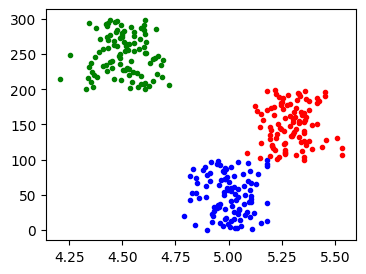

In [82]:
draw_graph(std=0.1)

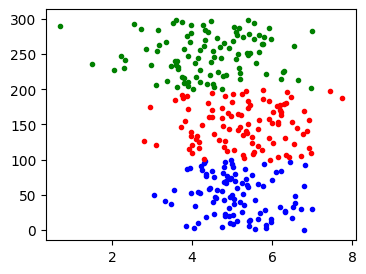

In [83]:
draw_graph(std=1)

#### 4-2.ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù(One-way ANOVA)
- ÎèÖÎ¶ΩÎ≥ÄÏàò : Î≤îÏ£ºÌòï 1Í∞ú, Ï¢ÖÏÜçÎ≥ÄÏàò : Ïó∞ÏÜçÌòï
- ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Î≥ÄÌôîÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Î≥¥Í∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©
- Í∞ÄÏ†ï : ÎèÖÎ¶ΩÏÑ±, Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ±
- scipy.statsÏù¥ÎÇò statsmodel ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©

In [ ]:
# ÏòàÏãú Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö
# irisÏùò targetÏù¥ 0 : 'setosa', 1 : 'versicolor', 2: 'virginica' ÌíàÏ¢Ö
# ÎèÖÎ¶ΩÎ≥ÄÏàò :'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'   
# ÌíàÏ¢ÖÎ≥Ñ sepal, petalÏùò length, widthÍ∞Ä Ï∞®Ïù¥Î•º Î≥¥ÏùºÍπå?Ïóê anova ÏÇ¨Ïö©

In [84]:
# [1] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
import pandas as pd

iris = pd.read_csv('bigdata/iris_data.csv')
iris.columns = ['sepal_length', 'sepal_width', 
                'petal_length', 'petal_width', 'target']
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [87]:
# [2-1] ÌíàÏ¢ÖÎ≥Ñ Í∞Å Î≥ÄÏàòÏùò ÌèâÍ∑† ÌôïÏù∏
iris.groupby('target').mean()

sepal_length  sepal_width  petal_length  petal_width
target                                                      
0              5.006        3.428         1.462        0.246
1              5.936        2.770         4.260        1.326
2              6.588        2.974         5.552        2.026

In [89]:
# [2-2] ÌäπÏ†ï Î≥ÄÏàòÏóê ÎåÄÌïú ÌíàÏ¢ÖÎ≥Ñ ÌèâÍ∑† ÌôïÏù∏
feature = 'sepal_width'
iris.groupby('target')[feature].mean()

target
0    3.428
1    2.770
2    2.974
Name: sepal_width, dtype: float64

In [ ]:
# group 0, 1, 2Ïùò ÌèâÍ∑†Ïùò Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§
# ÌèâÍ∑†Í∞íÏùò Ï∞®Ïù¥Í∞Ä Ïã§Ï†úÎ°ú ÏùòÎØ∏Í∞Ä ÏûàÎäî Ï∞®Ïù¥Ïù∏ÏßÄ ÏïåÍ≥† Ïã∂Îã§Î©¥,
# Î∂ÑÏÇ∞ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±ÏùÑ ÏïåÏïÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

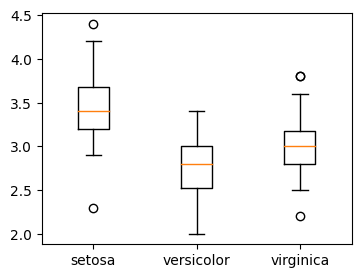

In [93]:
# [3] Í∑∏Î£π Ï∂îÏ∂ú Î∞è Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏
import matplotlib.pyplot as plt

data = [x[1].values for x in iris.groupby('target')[feature]]

plt.figure(figsize=(4,3))
plt.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

In [97]:
# [4] Ï†ïÍ∑úÏÑ± ÌôïÏù∏ 
# p-valueÍ∞Ä 0.05 Î≥¥Îã§ ÌÅ∞ Í∞íÏùº Îïå Ï†ïÍ∑úÏÑ±ÏùÑ Í∞ñÏùå
from scipy.stats import shapiro
data = [x[1].values for x in iris.groupby('target')[feature]]
_,pvalue0 = shapiro(data[0])
_,pvalue1 = shapiro(data[1])
_,pvalue2 = shapiro(data[2])
print(f'{pvalue0:.4f} {pvalue1:.4f} {pvalue2:.4f}') # 0.2715 0.3380 0.1809 Ï†ïÍ∑úÏÑ± ÎßåÏ°±

0.2715 0.3380 0.1809


In [101]:
# [5] Îì±Î∂ÑÏÇ∞ÏÑ± ÌôïÏù∏
# p-valueÍ∞Ä 0.05 Î≥¥Îã§ ÌÅ∞ Í∞íÏùº Îïå Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ Í∞ñÏùå
from scipy.stats import bartlett
# _,pvalue = bartlett(data[0],data[1],data[2])
_,pvalue = bartlett(*data)
print(f'{pvalue:.4f}')                      # 0.3515 Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°± 


0.3515


Scipy.stats ÏúºÎ°ú ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [105]:
# [6] ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù - 1
from scipy.stats import f_oneway
F, pvalue = f_oneway(*data)
print(f'iris Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F={F:.1f}, p={pvalue:.5f}')  
if pvalue < 0.05:
    print('P-value Í∞íÏù¥ Ï∂©Î∂ÑÌûà ÏûëÏùåÏúºÎ°ú Ïù∏Ìï¥ \
Í∑∏Î£πÏùò ÌèâÍ∑†Í∞íÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå')

iris Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F=49.2, p=0.00000
P-value Í∞íÏù¥ Ï∂©Î∂ÑÌûà ÏûëÏùåÏúºÎ°ú Ïù∏Ìï¥ Í∑∏Î£πÏùò ÌèâÍ∑†Í∞íÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå


pandas ÏôÄ statsmodels Î•º ÏÇ¨Ïö©Ìïú ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù
- https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html
- https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html 

ols (ordinary least squares) Î™®Îç∏ 
- Íµ¨ÌïòÎ†§Îäî Ìï¥ÏôÄ Ïã§Ï†úÏùò Ïò§Ï∞®Ïùò Ï†úÍ≥±Ïùò Ìï©Ïù¥ ÏµúÏÜåÍ∞Ä ÎêòÎäî Ìï¥Î•º Íµ¨ÌïòÎäî Î∞©Î≤ï

'value ~ C(treatment)' : 'Ï¢ÖÏÜçÎ≥ÄÏàò ~ C(ÎèÖÎ¶ΩÎ≥ÄÏàò)'
- value : Ï¢ÖÏÜçÎ≥ÄÏàò
- treatment : Î≤îÏ£ºÌòï(C)Ïù∏ ÎèÖÎ¶ΩÎ≥ÄÏàò
- df : degree of freedom
- C(treatment)Ïùò df : Í∑∏Î£πÏùò Ïàò - 1
- ResidualÏùò df : Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò - Í∑∏Î£πÏùò Ïàò

In [106]:
# [7] ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù - 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = iris[['target', 'sepal_width']]
lm = ols('sepal_width ~ C(target)', data).fit()
result = sm.stats.anova_lm(lm)
print(result)

              df     sum_sq   mean_sq         F        PR(>F)
C(target)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual   147.0  16.962000  0.115388       NaN           NaN


In [107]:
# C(target)Ïùò PR(=p-value) Í∞íÏù¥ 0.05 Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Í∑∏Î£πÏùò 
# ÌèâÍ∑†Í∞íÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï∞®Ïù¥Í∞Ä ÏûàÏùå

In [108]:
# Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Ïñ¥Îñ§ ÏßëÎã®Ïù¥ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥ ÏÇ¨ÌõÑÎ∂ÑÏÑù(post hoc tests)Î•º Ìï¥ÏïºÌï®
# Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎäî Í≤ΩÏö∞Îäî ÏÇ¨ÌõÑÎ∂ÑÏÑùÌï† ÌïÑÏöîÍ∞Ä ÏóÜÏùå

ÏÇ¨ÌõÑÍ≤ÄÏ†ï(Post Hoc Analysis)
- ANOVA Î∂ÑÏÑùÏùò Î¨∏Ï†ú : Îã§Î•¥Îã§Îäî Í≤ÉÏùÄ ÏïåÏßÄÎßå, Ïñ¥Îñ§ ÏßëÎã®Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎäî Ïïå Ïàò ÏóÜÏùå
- ÏÇ¨ÌõÑÍ≤ÄÏ†ïÏùÑ ÌÜµÌï¥ Ïñ¥Îñ§ Í≤ÉÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Ï∞æÏùÑ Ïàò ÏûàÏùå
- post hocÏùÄ ÎùºÌã¥Ïñ¥Î°ú "after this"Ïùò Îúª
- ÏÇ¨ÌõÑÍ≤ÄÏ†ïÏùò Ï¢ÖÎ•ò
    - Tukey's HSD (Honest Significant Difference) test : Ï†ïÍ∑úÎ∂ÑÌè¨, Îì±Î∂ÑÏÇ∞, ÎèôÏùº ÌëúÎ≥∏ ÌÅ¨Í∏∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÏÇ¨Ïö©
    - Duncan‚Äôs new multiple range test (MRT) : Ï†ïÍ∑úÎ∂ÑÌè¨, Îì±Î∂ÑÏÇ∞, ÎèôÏùº ÌëúÎ≥∏ ÌÅ¨Í∏∞ÏóêÏÑú ÏÇ¨Ïö©, ÏóÑÍ≤©ÌïòÏßÄ ÏïäÏùÄ Í∏∞Ï§ÄÏúºÎ°ú ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±ÏùÑ ÎèÑÏ∂úÌïòÍ∏∞ Ïâ¨ÏõÄ
    - Scheff√©‚Äôs Method : Í∞ÄÏû• Î≥¥ÏàòÏ†ÅÏù¥Í≥† ÏóÑÍ≤©Ìïú ÏÇ¨ÌõÑÍ≤ÄÏ†ïÎ∞©Ïãù (ÎèôÏùºÌïòÏßÄ ÏïäÏùÄ ÌëúÎ≥∏ ÌÅ¨Í∏∞)
- ÎØºÍ∞êÎèÑ(sensitivity)Î°ú Íµ¨Î∂Ñ : Scheffe < Tukey < Duncan
- DuncanÏùò Î∞©Î≤ïÏùÄ ÏûëÏùÄ Ï∞®Ïù¥ÏóêÎèÑ Ï∞®Ïù¥Í∞Ä ÎÇúÎã§ÎùºÍ≥† ÌïòÏßÄÎßå, ScheffeÏùò Î∞©Î≤ïÏùÄ ÌôïÏã§Ìïú Ï∞®Ïù¥Í∞Ä ÎÇòÏïºÎßå ÎπÑÎ°úÏÜå Ï∞®Ïù¥Í∞Ä ÏûàÎã§ÎùºÍ≥† ÌåêÎã®Ìï®


Tukey test
- statsmodelsÏùò Tukey testÎ•º ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî DataFrameÏùò ÌòïÌÉúÎ•º Î≥ÄÍ≤ΩÌï¥Ïïº Ìï®
- ÌïòÎÇòÏùò Ïª¨ÎüºÏùÄ Î∂ÑÎ•òÌï†Ïàò ÏûàÎäî Ïù¥Î¶Ñ(label)ÏùÑ Îã§Î•∏ Ïª¨ÎüºÏùÄ Ïã§ÌóòÍ∞í(values)Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäî ÌòïÌÉúÏù¥Ïñ¥Ïïº Ìï®

[Ï∞∏Í≥†] scheffe : https://eunholand.tistory.com/96

In [ ]:
# [7] ÏÇ¨ÌõÑ Í≤ÄÏ†ï
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
# Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Î™®Îì† Í∑∏Î£πÏóêÏÑú ÌÜµÍ≥ÑÏ†ÅÏù∏ Ïú†ÏùòÎØ∏ÏÑ±(P-value < 0.05)ÏùÑ Í∞ÄÏßà Ïàò ÏûàÎäîÍ≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏùå

In [ ]:
# [8] Í∑∏Î¶ºÏúºÎ°ú ÌôïÏù∏ÌïòÍ∏∞


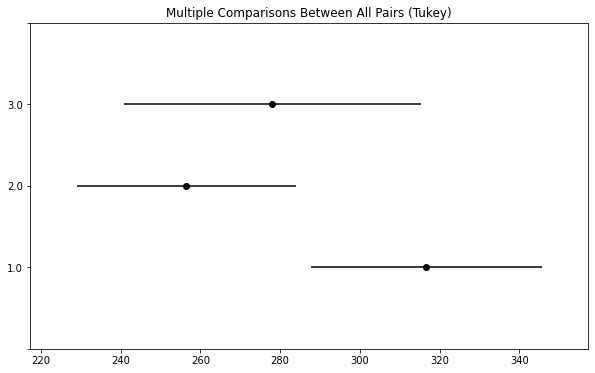

In [ ]:
# ÌÜµÍ≥ÑÏ†Å ÏùòÎØ∏ Í∞ñÏßÄ ÏïäÎäî Í≤ΩÏö∞
# Í∑∏Î¶ºÏóêÏÑú Î≥º Ïàò ÏûàÎìØÏù¥, Í∑∏Î£π 1.0Í≥º 2.0ÏùÄ ÏÑúÎ°ú Í≤πÏπòÏßÄ ÏïäÎäîÍ≤ÉÏùÑ Î≥º Ïàò ÏûàÏùå
# Î∞òÎ©¥,1Í≥º 3, 2ÏôÄ 3ÏùÄ Í≤πÏπòÍ∏∞ ÎïåÎ¨∏Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Í≥† Ìï† Ïàò ÏûàÏùå

In [ ]:
##  23ÎÖÑ 5Ïõî 31Ïùº Ïò§Ï†Ñ - Ïó¨Í∏∞ÍπåÏßÄ

#### 4-3.Ïù¥ÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù(Two-way ANOVA)
- ÎèÖÎ¶ΩÎ≥ÄÏù∏Ïùò ÏàòÍ∞Ä Îëê Í∞úÏùº Îïå ÏßëÎã® Í∞Ñ Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïúÏßÄÎ•º Í≤ÄÏ¶ùÌïòÎäî Îç∞ ÏÇ¨Ïö©
- ÏÉÅÌò∏ÏûëÏö©Ìö®Í≥º(Interaction effect) Ï¶â, Ìïú Î≥ÄÏàòÏùò Î≥ÄÌôîÍ∞Ä Í≤∞Í≥ºÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ Îã§Î•∏ Î≥ÄÏàòÏùò ÏàòÏ§ÄÏóê Îî∞Îùº Îã¨ÎùºÏßÄÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îê®
- scipy.statsÏù¥ÎÇò statsmodels ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©

ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞(altman_12_6) ÏÑ§Î™Ö
ÌÉúÏïÑÏùò Î®∏Î¶¨ ÎëòÎ†à Ï∏°Ï†ï Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. 
4Î™ÖÏùò Í¥ÄÏ∏°ÏûêÍ∞Ä 3Î™ÖÏùò ÌÉúÏïÑÎ•º ÎåÄÏÉÅÏúºÎ°ú Ï∏°Ï†ïÏùÑ ÌñàÏäµÎãàÎã§. 
Ïù¥Î•º ÌÜµÌï¥ÏÑú Ï¥àÏùåÌååÎ°ú ÌÉúÏïÑÏùò Î®∏Î¶¨ ÎëòÎ†àÏ∏°Ï†ï Îç∞Ïù¥ÌÑ∞Í∞Ä Ïû¨ÌòÑÏÑ±Ïù¥ ÏûàÎäîÏßÄÎ•º Ï°∞ÏÇ¨ÌïòÏòÄÏäµÎãàÎã§.

In [ ]:
# [1] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
import pandas as pd
data = pd.read_csv('data_02/altman.csv')
data.tail()

head_size  fetus  observer
31       12.7    3.0       3.0
32       12.5    3.0       3.0
33       13.0    3.0       4.0
34       12.9    3.0       4.0
35       13.8    3.0       4.0

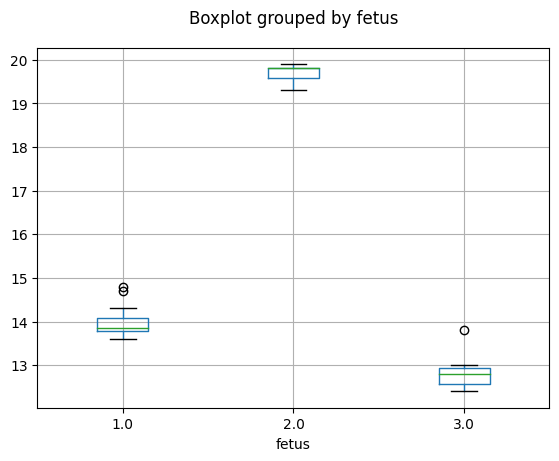

In [ ]:
# [2] ÌÉúÏïÑÎ≥Ñ Î®∏Î¶¨ ÎëòÎ†à plot ÎßåÎì§Í∏∞
import matplotlib.pyplot as plt
data.boxplot(column='head_size', by='fetus' , grid=True)
plt.title('')
plt.show()

In [ ]:
# [3] ÌÉúÏïÑÎ≥Ñ Î®∏Î¶¨ ÎëòÎ†à ÌèâÍ∑†ÏùÑ Íµ¨Ìï¥Î¥ÖÎãàÎã§
data.groupby('fetus')['head_size'].mean()

fetus
1.0    13.991667
2.0    19.691667
3.0    12.825000
Name: head_size, dtype: float64

In [ ]:
# Í∑∏Î¶ºÏóêÏÑú ÌÉúÏïÑ(fetus) 3Î™ÖÏùò Î®∏Î¶¨ ÎëòÎ†àÎäî Ï∞®Ïù¥Í∞Ä ÏûàÏñ¥ Î≥¥ÏûÖÎãàÎã§.
# Í¥ÄÏ∏°ÏûêÏôÄ ÌÉúÏïÑÏóê ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Ïó¨Î∂ÄÎ•º Two way ANOVAÎ•º ÌÜµÌï¥ ÏïåÏïÑ Î≥¥Í≤†ÏäµÎãàÎã§

In [ ]:
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Í¥ÄÏ∏°ÏûêÎ≥Ñ Î®∏Î¶¨ÎëòÎ†à ÌèâÍ∑†ÏùÄ ÎèôÏùºÌïòÎã§
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Í¥ÄÏ∏°ÏûêÎ≥Ñ Î®∏Î¶¨ÎëòÎ†à ÌèâÍ∑†ÏùÄ ÎèôÏùºÌïòÏßÄ ÏïäÎã§ (Ï∞®Ïù¥Í∞Ä ÏûàÎã§)
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÌÉúÏïÑÎ≥Ñ Î®∏Î¶¨ÎëòÎ†à ÌèâÍ∑†ÏùÄ ÎèôÏùºÌïòÎã§
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÌÉúÏïÑÎ≥Ñ Î®∏Î¶¨ÎëòÎ†à ÌèâÍ∑†ÏùÄ ÎèôÏùºÌïòÏßÄ ÏïäÎã§ (Ï∞®Ïù¥Í∞Ä ÏûàÎã§)
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Î®∏Î¶¨ÎëòÎ†àÌèâÍ∑†Ïóê ÎåÄÌï¥ Ï∏°Ï†ïÏûêÏôÄ ÌÉúÏïÑÏóê ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏóÜÎã§
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Î®∏Î¶¨ÎëòÎ†àÌèâÍ∑†Ïóê ÎåÄÌï¥ Ï∏°Ï†ïÏûêÏôÄ ÌÉúÏïÑÏóê ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏûàÎã§

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [ ]:
# C(fetus):C(observer)Ïùò P-value Í∞Ä 0.05 Ïù¥ÏÉÅ ÏûÖÎãàÎã§, 
# Îî∞ÎùºÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÍ≥†. 
# Î®∏Î¶¨ÎëòÎ†àÌèâÍ∑†Ïóê ÎåÄÌï¥ Ï∏°Ï†ïÏûêÏôÄ ÌÉúÏïÑÏóê ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏóÜÎã§
